In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [90]:
df = pd.read_csv('dataset.csv', sep=';')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   purchased     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,294478.0,787974.124733,91210.823776,630000.0,709032.25,787933.5,866911.75,945999.0
purchased,294478.0,0.119659,0.324563,0.0,0.00,0.0,0.00,1.0


In [93]:
df['timestamp'] = pd.to_datetime(df.timestamp)
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H')
df

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22,control,old_page,0
1,804228,2017-01-12 08,control,old_page,0
2,661590,2017-01-11 16,treatment,new_page,0
3,853541,2017-01-08 18,treatment,new_page,0
4,864975,2017-01-21 01,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22,control,old_page,0
294474,945152,2017-01-12 00,control,old_page,0
294475,734608,2017-01-22 11,control,old_page,0
294476,697314,2017-01-15 01,control,old_page,0


In [97]:
df = df.drop('group', axis=1)

KeyError: "['group'] not found in axis"

In [95]:
df.head()

,user_id,timestamp,landing_page,purchased
0,851104,2017-01-21 22,old_page,0
1,804228,2017-01-12 08,old_page,0
2,661590,2017-01-11 16,new_page,0
3,853541,2017-01-08 18,new_page,0
4,864975,2017-01-21 01,old_page,1


In [103]:
# group by timestamp date

data_df = pd.DataFrame()

df_date_old = df[df.landing_page == 'old_page'].groupby(df.timestamp).agg({'user_id': 'count', 'purchased': 'sum'})
df_date_new = df[df.landing_page == 'new_page'].groupby(df.timestamp).agg({'user_id': 'count', 'purchased': 'sum'})
data_df['old_conversion'] = df_date_old.purchased / df_date_old.user_id
data_df['new_conversion'] = df_date_new.purchased / df_date_new.user_id
data_df

,old_conversion,new_conversion
timestamp,,
2017-01-02 13,0.132530,0.102273
2017-01-02 14,0.142857,0.117647
2017-01-02 15,0.132000,0.093750
2017-01-02 16,0.113139,0.129964
2017-01-02 17,0.120000,0.134831
...,...,...
2017-01-24 09,0.109966,0.130769
2017-01-24 10,0.108696,0.111511
2017-01-24 11,0.117647,0.132812


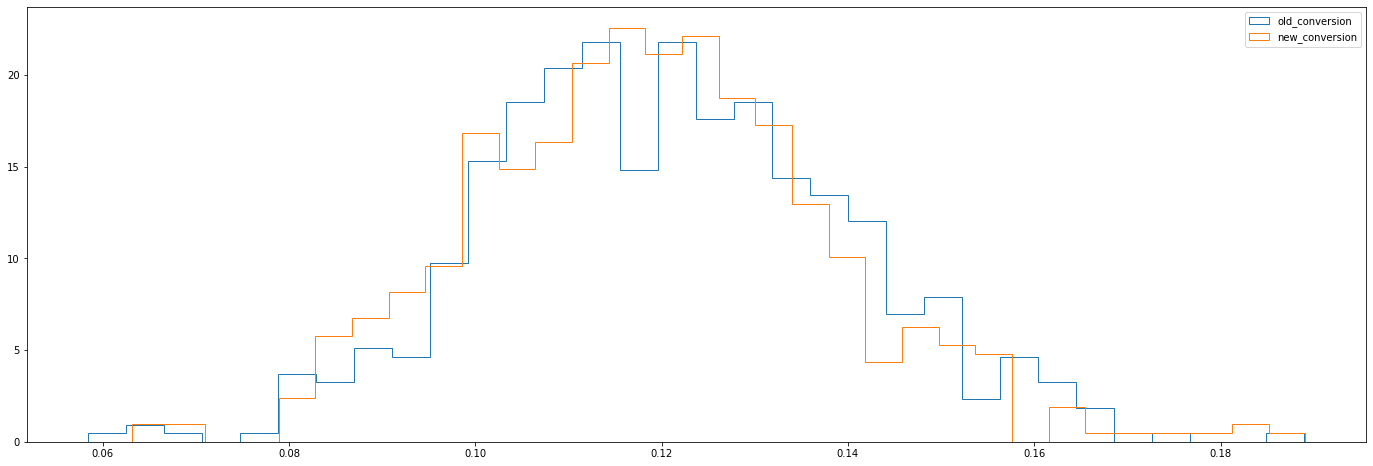

In [113]:
plt.figure(figsize=(8 * 3, 8))
plt.hist(data_df['old_conversion'], label='old_conversion', histtype='step', bins=32, density=True)
plt.hist(data_df['new_conversion'], label='new_conversion', histtype='step', bins=32, density=True)
plt.legend();

T-statistic: 1.321
P-value: 0.187
The change in conversion rate is not statistically significant (p-value = 0.187)


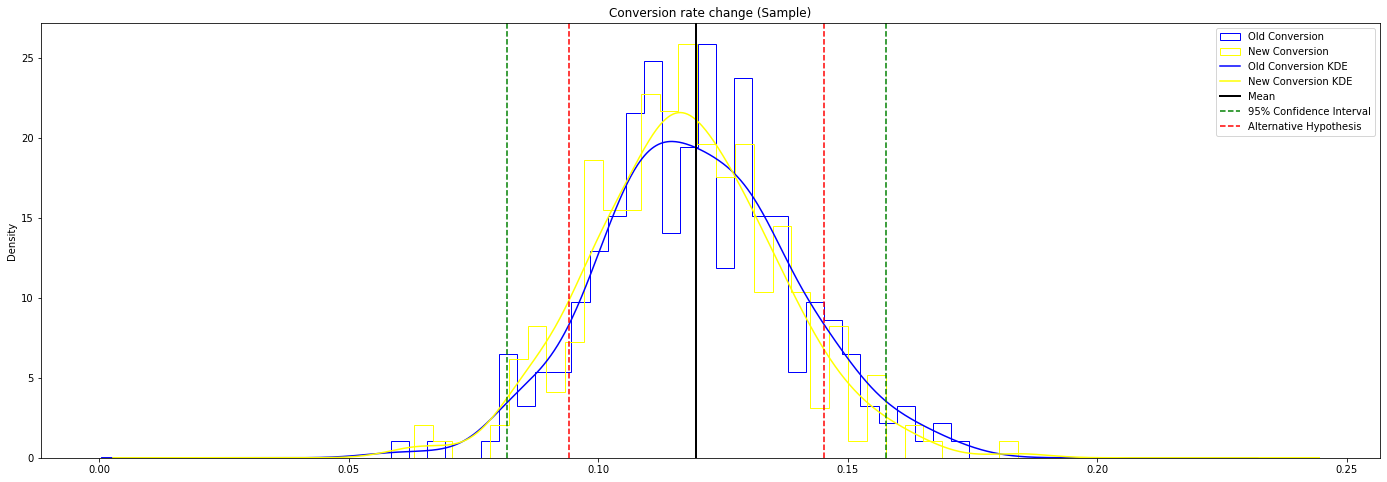

In [321]:
# Perform a t-test to see if the change in conversion rate is statistically significant
from scipy import stats

confidence_level = 0.95
critical_value = 1 - confidence_level

old_conversion_sample = data_df['old_conversion'].sample(n=256)
new_conversion_sample = data_df['new_conversion'].sample(n=256)

_mean = old_conversion_sample.mean()
_std = old_conversion_sample.std()

lower_bound, upper_bound = stats.norm.interval(confidence_level, loc=_mean, scale=_std)
t_stat, p_value = stats.ttest_ind(old_conversion_sample, new_conversion_sample)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < critical_value:
    print(f"The change in conversion rate is statistically significant (p-value = {p_value:.3f})")
else:
    print(f"The change in conversion rate is not statistically significant (p-value = {p_value:.3f})")

plt.figure(figsize=(8 * 3, 8))
plt.title(f"Conversion rate change (Sample)")
plt.hist(old_conversion_sample, label='Old Conversion', histtype='step', bins=32, density=True, color='blue')
plt.hist(new_conversion_sample, label='New Conversion', histtype='step', bins=32, density=True, color='yellow')

old_conversion_sample.plot.kde(label='Old Conversion KDE', color='blue')
new_conversion_sample.plot.kde(label='New Conversion KDE', color='yellow')

# Plot Mean
plt.axvline(_mean, color='k',linewidth=2, label='Mean')

# Plot Confidence Interval
plt.axvline(x=lower_bound, color='g', linestyle='--', label=f'{confidence_level * 100:.0f}% Confidence Interval')
plt.axvline(x=upper_bound, color='g', linestyle='--')

# Plot Alternative Hypothesis
plt.axvline(x=_mean + t_stat * _std, color='r', linestyle='--', label='Alternative Hypothesis')
plt.axvline(x=_mean - t_stat * _std, color='r', linestyle='--')

plt.legend();